In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_json('../csv/acn_transfer.json')
df['connectionTime'] = pd.to_datetime(df['connectionTime'], format='mixed', utc=True)
df['disconnectTime'] = pd.to_datetime(df['disconnectTime'], format='mixed', utc=True)
df['doneChargingTime'] = pd.to_datetime(df['doneChargingTime'], format='mixed', utc=True)
xx = df['userInputs'].apply(lambda x:x[-1] if isinstance(x,list) and len(x)>0 else None)
flod  = pd.json_normalize(xx)
df = pd.concat([df,flod],axis=1)
df['requestedDeparture'] = pd.to_datetime(df['requestedDeparture'],format='mixed',utc=True)
df['modifiedAt'] = pd.to_datetime(df['modifiedAt'],format='mixed',utc=True)
df

,_id,clusterID,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,...,WhPerMile,kWhRequested,milesRequested,minutesAvailable,modifiedAt,paymentRequired,requestedDeparture,userID,kmRequested,WhPerKM
0,5dd1f434f9af8b2dec178075,39,2019-11-01 18:11:18+00:00,2019-11-02 02:55:36+00:00,2019-11-02 01:16:41+00:00,14.101,2_39_78_360_2019-11-01 18:11:18.415605,2,CA-322,2-39-78-360,...,400.0,24.0,60.0,443.0,2019-11-01 18:11:28+00:00,True,2019-11-02 01:34:18+00:00,676.0,96.5604,248.549095
1,5dd1f434f9af8b2dec178076,39,2019-11-01 18:30:34+00:00,2019-11-01 22:15:42+00:00,2019-11-01 22:15:39+00:00,6.962,2_39_78_367_2019-11-01 18:30:33.896233,2,CA-494,2-39-78-367,...,375.0,15.0,40.0,378.0,2019-11-01 18:31:47+00:00,True,2019-11-02 00:48:34+00:00,3447.0,64.3736,233.014776
2,5dd1f434f9af8b2dec178077,39,2019-11-01 18:55:24+00:00,2019-11-01 19:33:16+00:00,2019-11-01 19:33:12+00:00,2.394,2_39_78_361_2019-11-01 18:55:23.831102,2,CA-493,2-39-78-361,...,400.0,36.0,90.0,311.0,2019-11-01 18:55:48+00:00,True,2019-11-02 00:06:24+00:00,832.0,144.8406,248.549095
3,5dd1f434f9af8b2dec178078,39,2019-11-01 19:10:30+00:00,2019-11-02 05:12:26+00:00,2019-11-01 20:15:26+00:00,2.160,2_39_123_23_2019-11-01 19:10:29.559896,2,CA-313,2-39-123-23,...,400.0,16.0,40.0,291.0,2019-11-01 19:10:57+00:00,True,2019-11-02 00:01:30+00:00,1082.0,64.3736,248.549095
4,5dd1f434f9af8b2dec178079,39,2019-11-01 19:44:41+00:00,2019-11-01 23:22:16+00:00,2019-11-01 22:20:49+00:00,6.756,2_39_78_366_2019-11-01 19:38:12.363403,2,CA-323,2-39-78-366,...,400.0,8.0,20.0,60.0,2019-11-01 19:44:41+00:00,True,2019-11-01 20:44:41+00:00,1124.0,32.1868,248.549095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6900,61550519f9af8b76960e169a,39,2021-09-13 21:12:53+00:00,2021-09-14 00:25:36+00:00,2021-09-13 21:41:31+00:00,2.285,2_39_89_25_2021-09-13 21:12:53.318460,2,CA-315,2-39-89-25,...,286.0,28.6,100.0,480.0,2021-09-13 21:13:32+00:00,True,2021-09-14 05:12:53+00:00,431.0,160.9340,177.712603
6901,61550519f9af8b76960e169b,39,2021-09-13 21:17:04+00:00,2021-09-14 01:01:49+00:00,2021-09-13 23:18:07+00:00,6.715,2_39_123_23_2021-09-13 21:16:44.026068,2,CA-313,2-39-123-23,...,460.0,11.5,25.0,150.0,2021-09-13 21:17:49+00:00,True,2021-09-13 23:47:04+00:00,6481.0,40.2335,285.831459
6902,61550519f9af8b76960e169c,39,2021-09-13 22:33:07+00:00,2021-09-13 23:06:55+00:00,NaT,17.720,2_39_81_4550_2021-09-13 22:33:04.543952,2,11900388,2-39-81-4550,...,300.0,30.0,100.0,288.0,2021-09-13 22:33:07+00:00,True,2021-09-14 03:21:07+00:00,3905.0,160.9340,186.411821
6903,61550519f9af8b76960e169d,39,2021-09-13 23:11:12+00:00,2021-09-14 01:43:11+00:00,2021-09-14 00:13:35+00:00,2.018,2_39_91_437_2021-09-13 23:10:59.528292,2,CA-317,2-39-91-437,...,290.0,5.8,20.0,120.0,2021-09-13 23:11:12+00:00,True,2021-09-14 01:11:12+00:00,1082.0,32.1868,180.198094


In [43]:
df.loc[df['stationID'] == '2-39-95-444']

,_id,clusterID,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,...,WhPerMile,kWhRequested,milesRequested,minutesAvailable,modifiedAt,paymentRequired,requestedDeparture,userID,kmRequested,WhPerKM
55,5dd5e8b0f9af8b39b02749e2,39,2019-11-04 18:13:18+00:00,2019-11-05 01:47:21+00:00,2019-11-04 20:04:53+00:00,11.191,2_39_95_444_2019-11-04 18:13:18.285854,2,CA-497,2-39-95-444,...,400.0,12.00,30.0,422.0,2019-11-04 18:13:34+00:00,True,2019-11-05 01:15:18+00:00,1095.0,48.2802,248.549095
96,5dd73a31f9af8b76d1666b55,39,2019-11-05 18:06:52+00:00,2019-11-06 02:59:44+00:00,2019-11-05 19:54:46+00:00,11.548,2_39_95_444_2019-11-05 18:06:52.427794,2,CA-497,2-39-95-444,...,400.0,28.00,70.0,60.0,2019-11-05 18:06:56+00:00,True,2019-11-05 19:06:52+00:00,558.0,112.6538,248.549095
136,5dd88bb1f9af8b7afc4cf606,39,2019-11-06 18:13:03+00:00,2019-11-07 01:07:29+00:00,2019-11-06 21:16:45+00:00,19.873,2_39_95_444_2019-11-06 18:13:03.079613,2,CA-497,2-39-95-444,...,400.0,20.00,50.0,414.0,2019-11-06 18:13:28+00:00,True,2019-11-07 01:07:03+00:00,832.0,80.4670,248.549095
173,5dd9dd36f9af8b7ec95087db,39,2019-11-07 19:03:14+00:00,2019-11-07 23:07:34+00:00,2019-11-07 23:08:32+00:00,8.895,2_39_95_444_2019-11-07 19:03:14.268030,2,CA-497,2-39-95-444,...,300.0,9.00,30.0,122.0,2019-11-07 23:07:09+00:00,True,2019-11-07 21:05:14+00:00,3250.0,48.2802,186.411821
187,5dd9dd36f9af8b7ec95087e9,39,2019-11-07 23:29:54+00:00,2019-11-08 02:13:22+00:00,2019-11-08 00:52:46+00:00,8.978,2_39_95_444_2019-11-07 23:29:54.150552,2,CA-497,2-39-95-444,...,400.0,20.00,50.0,173.0,2019-11-07 23:30:17+00:00,True,2019-11-08 02:22:54+00:00,1087.0,80.4670,248.549095
207,5ddb2eb2f9af8b03f1c6a4d9,39,2019-11-08 17:08:02+00:00,2019-11-09 04:11:28+00:00,2019-11-08 21:38:42+00:00,30.482,2_39_95_444_2019-11-08 17:08:02.380021,2,CA-497,2-39-95-444,...,250.0,57.50,230.0,510.0,2019-11-08 17:08:05+00:00,True,2019-11-09 01:38:02+00:00,1257.0,370.1482,155.343184
271,5ddf2332f9af8b2af1244c2e,39,2019-11-11 18:31:56+00:00,2019-11-11 20:34:57+00:00,2019-11-11 19:17:02+00:00,4.147,2_39_95_444_2019-11-11 18:31:55.531668,2,CA-497,2-39-95-444,...,425.0,4.25,10.0,166.0,2019-11-11 20:28:55+00:00,True,2019-11-11 21:17:56+00:00,668.0,16.0934,264.083413
283,5ddf2332f9af8b2af1244c3a,39,2019-11-11 23:30:35+00:00,2019-11-12 00:39:36+00:00,2019-11-12 00:39:32+00:00,6.653,2_39_95_444_2019-11-11 23:30:34.849857,2,CA-497,2-39-95-444,...,400.0,40.00,100.0,428.0,2019-11-11 23:37:16+00:00,True,2019-11-12 06:38:35+00:00,2290.0,160.9340,248.549095
309,5de074b6f9af8b2f030f59dc,39,2019-11-12 17:50:17+00:00,2019-11-13 02:12:25+00:00,2019-11-12 20:27:55+00:00,16.551,2_39_95_444_2019-11-12 17:50:17.430561,2,CA-497,2-39-95-444,...,400.0,40.00,100.0,60.0,2019-11-12 17:51:35+00:00,True,2019-11-12 18:50:17+00:00,2961.0,160.9340,248.549095
393,5de317b2f9af8b36cb9c026c,39,2019-11-14 20:20:11+00:00,2019-11-15 02:40:55+00:00,2019-11-15 01:19:05+00:00,0.874,2_39_95_444_2019-11-14 20:20:11.039376,2,CA-497,2-39-95-444,...,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN


In [40]:
import json

with open('../csv/Office_1_caltech.json', 'r', encoding='utf-8') as f:
	data = json.load(f)
df1json = data['_items']
metadata  = data['_meta']
df1 = pd.DataFrame(df1json)
# df1['connectionTime'] = pd.to_datetime(df1['connectionTime'], format='mixed', utc=True)
# df1['disconnectTime'] = pd.to_datetime(df1['disconnectTime'], format='mixed', utc=True)
# df1['doneChargingTime'] = pd.to_datetime(df1['doneChargingTime'], format='mixed', utc=True)
# xx = df1['userInputs'].apply(lambda x:x[-1] if isinstance(x,list) and len(x)>0 else None)
# flod  = pd.json_normalize(xx)
# df1 = pd.concat([df1,flod],axis=1)
# df1['requestedDeparture'] = pd.to_datetime(df1['requestedDeparture'],format='mixed',utc=True)
# df1['modifiedAt'] = pd.to_datetime(df1['modifiedAt'],format='mixed',utc=True)
print(metadata)
df1

{'end': 'Tue, 01 Jul 2025 18:10:00 GMT', 'min_kWh': None, 'site': 'office001', 'start': 'Fri, 01 Nov 2019 18:10:00 GMT'}


,_id,clusterID,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
0,5dd1f41ef9af8b2deaac58cd,0102,"Fri, 01 Nov 2019 20:23:22 GMT","Sat, 02 Nov 2019 04:02:39 GMT","Sat, 02 Nov 2019 04:02:30 GMT",24.876,19_102_260_1640_2019-11-01 20:23:21.631277,0019,08,19-102-260-1640,America/Los_Angeles,None,None
1,5dd49720f9af8b358eb1483e,0102,"Mon, 04 Nov 2019 15:49:08 GMT","Mon, 04 Nov 2019 20:41:12 GMT","Mon, 04 Nov 2019 17:39:04 GMT",5.371,19_102_260_1633_2019-11-04 15:49:08.163075,0019,02,19-102-260-1633,America/Los_Angeles,None,None
2,5dd49720f9af8b358eb1483f,0102,"Mon, 04 Nov 2019 16:21:40 GMT","Tue, 05 Nov 2019 00:49:38 GMT","Tue, 05 Nov 2019 00:49:34 GMT",43.608,19_102_260_1634_2019-11-04 16:21:40.233387,0019,03,19-102-260-1634,America/Los_Angeles,None,None
3,5dd49720f9af8b358eb14840,0102,"Mon, 04 Nov 2019 16:32:04 GMT","Tue, 05 Nov 2019 00:35:43 GMT","Mon, 04 Nov 2019 19:03:30 GMT",5.820,19_102_260_1640_2019-11-04 16:32:03.539339,0019,08,19-102-260-1640,America/Los_Angeles,None,None
4,5dd49720f9af8b358eb14841,0102,"Mon, 04 Nov 2019 16:41:01 GMT","Mon, 04 Nov 2019 19:42:33 GMT","Mon, 04 Nov 2019 17:45:10 GMT",5.851,19_102_260_1635_2019-11-04 16:41:00.781860,0019,01,19-102-260-1635,America/Los_Angeles,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,614fbf0df9af8b6e4f11442d,0102,"Thu, 09 Sep 2021 21:11:44 GMT","Fri, 10 Sep 2021 03:47:58 GMT","Fri, 10 Sep 2021 03:47:33 GMT",19.342,19_102_260_1640_2021-09-09 21:11:26.620176,0019,08,19-102-260-1640,America/Los_Angeles,000006140,"[{'WhPerMile': 258, 'kWhRequested': 72.24, 'mi..."
998,6151108ff9af8b70789b4fed,0102,"Fri, 10 Sep 2021 15:33:08 GMT","Fri, 10 Sep 2021 23:53:29 GMT","Fri, 10 Sep 2021 22:49:37 GMT",33.186,19_102_260_1634_2021-09-10 15:32:59.042125,0019,03,19-102-260-1634,America/Los_Angeles,000006620,"[{'WhPerMile': 1428, 'kWhRequested': 114.24, '..."
999,6151108ff9af8b70789b4fee,0102,"Fri, 10 Sep 2021 21:12:26 GMT","Sat, 11 Sep 2021 04:25:47 GMT","Sat, 11 Sep 2021 04:25:34 GMT",19.894,19_102_260_1640_2021-09-10 21:12:15.541083,0019,08,19-102-260-1640,America/Los_Angeles,000006140,"[{'WhPerMile': 258, 'kWhRequested': 72.24, 'mi..."
1000,61550514f9af8b76948f5921,0102,"Mon, 13 Sep 2021 17:35:32 GMT","Tue, 14 Sep 2021 00:26:25 GMT","Tue, 14 Sep 2021 00:26:05 GMT",26.688,19_102_260_1634_2021-09-13 17:35:24.605831,0019,03,19-102-260-1634,America/Los_Angeles,000006620,"[{'WhPerMile': 1428, 'kWhRequested': 114.24, '..."


In [2]:
# 시간 주간 일간 단위 리샘플링 인덱스 설정후 리셋
df = df.set_index('connectionTime')
hourly = df.resample('1h').sum(numeric_only=True)
daily = df.resample('1D').sum(numeric_only=True)
weekly = df.resample('1W').sum(numeric_only=True)
half_hourly = df.resample('30min').sum(numeric_only=True)
df = df.reset_index()

['CA-322' 'CA-494' 'CA-493' 'CA-313' 'CA-323' 'CA-317' 'CA-304' 'CA-495'
 'CA-307' 'CA-499' 'CA-318' 'CA-316' 'CA-303' 'CA-306' 'CA-490' 'CA-315'
 'CA-512' 'CA-326' 'CA-308' 'CA-212' 'CA-325' 'CA-305' 'CA-309' 'CA-312'
 'CA-492' 'CA-311' 'CA-491' 'CA-327' 'CA-489' 'CA-324' 'CA-319' 'CA-496'
 'CA-497' 'CA-321' 'CA-314' 'CA-498' 'CA-320' 'CA-501' 'CA-500' 'CA-513'
 'CA-502' 'CA-503' 'CA-310' 'CA-505' 'CA-511' 'CA-506' 'CA-507' 'CA-504'
 'CA-508' 'CA-509' 'CA-510' 'CA-149' 'CA-213' '11900388' 'CA-148']


<Axes: xlabel='spaceID'>

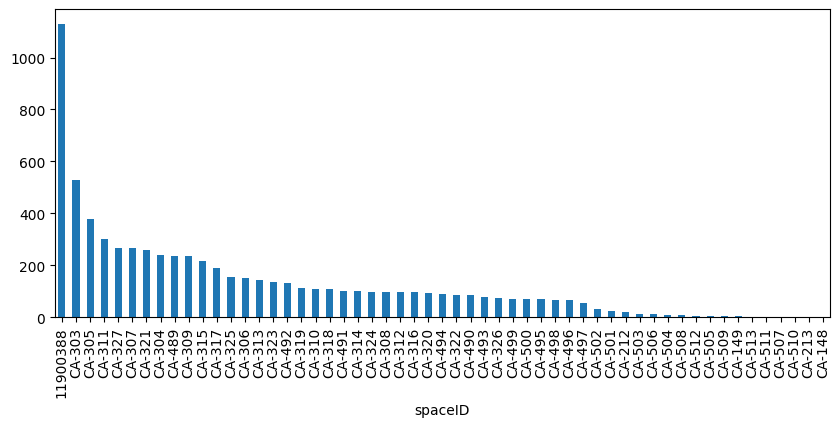

In [3]:
#충전소 분포 시각화
print(df['spaceID'].unique())
df['spaceID'].value_counts().plot(kind='bar', figsize=(10, 4))

#### EVSE 상태(State)
- Available	충전기 사용 가능 상태 (idle)
- Preparing	인증, 설정, 케이블 연결 중
- Charging	실제로 전력이 공급되고 있는 중
- SuspendedEVSE	충전기(EVSE)의 사유로 충전이 일시 중단됨 (예: 전력 제한)
- SuspendedEV	차량(EV) 쪽 사유로 충전이 일시 중단됨 (예: 충전 중단 요청)
- Finishing	충전 완료됨, 아직 차량이 물리적으로 연결됨
- Faulted	충전기 오류 상태 (사용 불가)
##### Available60% Finishing30% Faulted10% 로 만들예정

In [4]:
#전처리 테이블 생성
sort = df[['connectionTime', 'doneChargingTime','kWhDelivered','kWhRequested','WhPerMile','milesRequested','requestedDeparture','disconnectTime']].copy()
sort[['disconnectReasone','EVESstatus','StationId','EVSEID','EVESTYPE']] = None
site = ['SA01','SA02','SA03']
evse_map = {
    'SA01': ['E01', 'E02'],
    'SA02': ['E01', 'E02', 'E03', 'E04'],
    'SA03': ['E01', 'E02', 'E03', 'E04', 'E05']
}

def assign_evse(station_id):
    evse_list = evse_map.get(station_id, ['E01'])  # default fallback
    return station_id + '-' + np.random.choice(evse_list)

sort['StationId'] = np.random.choice(site, size=len(sort))
sort['EVSEID'] = sort['StationId'].apply(assign_evse)

sort

,connectionTime,doneChargingTime,kWhDelivered,kWhRequested,WhPerMile,milesRequested,requestedDeparture,disconnectTime,disconnectReasone,EVESstatus,StationId,EVSEID,EVESTYPE
0,2019-11-01 18:11:18+00:00,2019-11-02 01:16:41+00:00,14.101,24.0,400.0,60.0,2019-11-02 01:34:18+00:00,2019-11-02 02:55:36+00:00,None,None,SA03,SA03-E02,None
1,2019-11-01 18:30:34+00:00,2019-11-01 22:15:39+00:00,6.962,15.0,375.0,40.0,2019-11-02 00:48:34+00:00,2019-11-01 22:15:42+00:00,None,None,SA01,SA01-E01,None
2,2019-11-01 18:55:24+00:00,2019-11-01 19:33:12+00:00,2.394,36.0,400.0,90.0,2019-11-02 00:06:24+00:00,2019-11-01 19:33:16+00:00,None,None,SA03,SA03-E02,None
3,2019-11-01 19:10:30+00:00,2019-11-01 20:15:26+00:00,2.160,16.0,400.0,40.0,2019-11-02 00:01:30+00:00,2019-11-02 05:12:26+00:00,None,None,SA03,SA03-E02,None
4,2019-11-01 19:44:41+00:00,2019-11-01 22:20:49+00:00,6.756,8.0,400.0,20.0,2019-11-01 20:44:41+00:00,2019-11-01 23:22:16+00:00,None,None,SA03,SA03-E05,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6900,2021-09-13 21:12:53+00:00,2021-09-13 21:41:31+00:00,2.285,28.6,286.0,100.0,2021-09-14 05:12:53+00:00,2021-09-14 00:25:36+00:00,None,None,SA02,SA02-E02,None
6901,2021-09-13 21:17:04+00:00,2021-09-13 23:18:07+00:00,6.715,11.5,460.0,25.0,2021-09-13 23:47:04+00:00,2021-09-14 01:01:49+00:00,None,None,SA03,SA03-E03,None
6902,2021-09-13 22:33:07+00:00,NaT,17.720,30.0,300.0,100.0,2021-09-14 03:21:07+00:00,2021-09-13 23:06:55+00:00,None,None,SA01,SA01-E02,None
6903,2021-09-13 23:11:12+00:00,2021-09-14 00:13:35+00:00,2.018,5.8,290.0,20.0,2021-09-14 01:11:12+00:00,2021-09-14 01:43:11+00:00,None,None,SA01,SA01-E02,None


In [ ]:
sort.columns

In [5]:
#충전기에 꼽았지만 충전을 요청하지 않은 경우 결측치 0처리
sort[['kWhRequested','WhPerMile','milesRequested']] = sort[['kWhRequested','WhPerMile','milesRequested']].fillna(0)

In [6]:
#출발 예정시간 없음  - 분석 결과 = 충전 요청이 없음  - 처리 = 충전량 이상치 3건 33, 46, 24 제거
sort = sort.drop(index=[5158,4684,5924]) #충전량 이상치 3건 33, 46, 24 제거
# sort[sort[['requestedDeparture']].isna().any(axis=1)]

In [7]:
# 연결 시간 5분 이하
time_diff = sort['disconnectTime']-sort['connectionTime']
less_5min = (time_diff<pd.Timedelta(minutes=5))
nodonetime = sort[['doneChargingTime']].isna().all(axis=1)
donetime = sort[['doneChargingTime']].notna().all(axis=1)
m1 = donetime&less_5min
m2 = nodonetime&less_5min 
# sort.loc[m1,'disconnectReasone'] = 'EVDisconnected'
# sort.loc[m1,'EVESstatus'] = 'Available'
# sort.loc[m2,'disconnectReasone'] = 'EVDisconnected'
# sort.loc[m2,'EVESstatus'] = 'Available'

In [8]:
#출발 예정시간 없고 충전완료시간 없음 - 분석결과 = 충전요청 없음 
mask1 = sort[['doneChargingTime', 'requestedDeparture']].isna().all(axis=1)
# sort.loc[mask1, 'doneChargingTime'] = sort.loc[mask1, 'disconnectTime']
time_diff = sort['disconnectTime']-sort['connectionTime']
same_day = (sort['disconnectTime'].dt.date == sort['connectionTime'].dt.date)
less_5min = (time_diff<pd.Timedelta(minutes=5))
sort[mask1]

,connectionTime,doneChargingTime,kWhDelivered,kWhRequested,WhPerMile,milesRequested,requestedDeparture,disconnectTime,disconnectReasone,EVESstatus,StationId,EVSEID,EVESTYPE
1381,2019-12-30 18:09:38+00:00,NaT,0.925,0.0,0.0,0.0,NaT,2019-12-30 19:37:50+00:00,None,None,SA03,SA03-E01,None
1608,2020-01-11 16:36:16+00:00,NaT,0.980,0.0,0.0,0.0,NaT,2020-01-11 22:53:20+00:00,None,None,SA01,SA01-E01,None
1615,2020-01-12 17:05:48+00:00,NaT,0.675,0.0,0.0,0.0,NaT,2020-01-12 17:28:19+00:00,None,None,SA03,SA03-E04,None
1987,2020-01-24 16:01:14+00:00,NaT,0.848,0.0,0.0,0.0,NaT,2020-01-24 18:15:33+00:00,None,None,SA03,SA03-E05,None
2003,2020-01-24 18:51:25+00:00,NaT,0.838,0.0,0.0,0.0,NaT,2020-01-24 20:54:14+00:00,None,None,SA01,SA01-E01,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6202,2021-08-11 14:35:44+00:00,NaT,0.883,0.0,0.0,0.0,NaT,2021-08-11 17:12:26+00:00,None,None,SA03,SA03-E01,None
6237,2021-08-12 18:03:55+00:00,NaT,0.854,0.0,0.0,0.0,NaT,2021-08-12 23:12:23+00:00,None,None,SA03,SA03-E01,None
6405,2021-08-21 01:02:04+00:00,NaT,0.897,0.0,0.0,0.0,NaT,2021-08-21 02:09:26+00:00,None,None,SA02,SA02-E03,None
6634,2021-09-01 21:00:17+00:00,NaT,0.895,0.0,0.0,0.0,NaT,2021-09-01 22:50:46+00:00,None,None,SA01,SA01-E02,None


In [9]:
#충전완료 시간없음
sort[sort[['doneChargingTime']].isna().any(axis=1)]

,connectionTime,doneChargingTime,kWhDelivered,kWhRequested,WhPerMile,milesRequested,requestedDeparture,disconnectTime,disconnectReasone,EVESstatus,StationId,EVSEID,EVESTYPE
1380,2019-12-30 17:43:48+00:00,NaT,5.814,8.0,400.0,20.0,2019-12-30 18:13:48+00:00,2019-12-30 19:47:48+00:00,None,None,SA01,SA01-E02,None
1381,2019-12-30 18:09:38+00:00,NaT,0.925,0.0,0.0,0.0,NaT,2019-12-30 19:37:50+00:00,None,None,SA03,SA03-E01,None
1382,2019-12-30 18:55:22+00:00,NaT,13.440,21.0,420.0,50.0,2019-12-30 23:42:22+00:00,2019-12-30 21:05:28+00:00,None,None,SA03,SA03-E03,None
1607,2020-01-11 14:27:47+00:00,NaT,15.707,32.0,400.0,80.0,2020-01-12 01:05:47+00:00,2020-01-11 18:35:08+00:00,None,None,SA01,SA01-E01,None
1608,2020-01-11 16:36:16+00:00,NaT,0.980,0.0,0.0,0.0,NaT,2020-01-11 22:53:20+00:00,None,None,SA01,SA01-E01,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6875,2021-09-13 06:31:02+00:00,NaT,44.996,18.5,370.0,50.0,2021-09-13 08:55:02+00:00,2021-09-13 08:00:26+00:00,None,None,SA01,SA01-E02,None
6894,2021-09-13 18:04:33+00:00,NaT,19.704,29.9,299.0,100.0,2021-09-14 02:04:33+00:00,2021-09-13 18:31:32+00:00,None,None,SA01,SA01-E01,None
6899,2021-09-13 20:26:50+00:00,NaT,49.136,25.9,370.0,70.0,2021-09-14 04:26:50+00:00,2021-09-13 21:56:03+00:00,None,None,SA03,SA03-E04,None
6902,2021-09-13 22:33:07+00:00,NaT,17.720,30.0,300.0,100.0,2021-09-14 03:21:07+00:00,2021-09-13 23:06:55+00:00,None,None,SA01,SA01-E02,None


In [10]:
#데이터 전처리 
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler

# 1. 시간 정보 변환
time_cols = ['connectionTime','doneChargingTime','requestedDeparture','disconnectTime']
time_df = sort[time_cols].copy()

for col in time_cols:
    #시간 -> timedelta 수치 데이터 전환
    time_df[col] = time_df[col].apply(lambda x: int(x.timestamp()) if pd.notnull(x) else 0).astype('int64')
    time_df[f'{col}_missing'] = sort[col].isnull().astype(int)  # 선택사항

# 2. 수치형 컬럼 추가
num_cols = ['kWhDelivered','kWhRequested','WhPerMile','milesRequested']
time_df[num_cols] = sort[num_cols]

# One-hot encoding
#만약 One-Hot이 컬럼을 너무 늘린다면 → PCA로 차원 축소 가능
station_dummies = pd.get_dummies(sort['StationId'], prefix='Station')
evseid_dummies = pd.get_dummies(sort['EVSEID'], prefix='EVSE')

# 병합
time_df = pd.concat([time_df, station_dummies, evseid_dummies], axis=1)
time_df

,connectionTime,doneChargingTime,requestedDeparture,disconnectTime,connectionTime_missing,doneChargingTime_missing,requestedDeparture_missing,disconnectTime_missing,kWhDelivered,kWhRequested,...,EVSE_SA01-E02,EVSE_SA02-E01,EVSE_SA02-E02,EVSE_SA02-E03,EVSE_SA02-E04,EVSE_SA03-E01,EVSE_SA03-E02,EVSE_SA03-E03,EVSE_SA03-E04,EVSE_SA03-E05
0,1572631878,1572657401,1572658458,1572663336,0,0,0,0,14.101,24.0,...,False,False,False,False,False,False,True,False,False,False
1,1572633034,1572646539,1572655714,1572646542,0,0,0,0,6.962,15.0,...,False,False,False,False,False,False,False,False,False,False
2,1572634524,1572636792,1572653184,1572636796,0,0,0,0,2.394,36.0,...,False,False,False,False,False,False,True,False,False,False
3,1572635430,1572639326,1572652890,1572671546,0,0,0,0,2.160,16.0,...,False,False,False,False,False,False,True,False,False,False
4,1572637481,1572646849,1572641081,1572650536,0,0,0,0,6.756,8.0,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6900,1631567573,1631569291,1631596373,1631579136,0,0,0,0,2.285,28.6,...,False,False,True,False,False,False,False,False,False,False
6901,1631567824,1631575087,1631576824,1631581309,0,0,0,0,6.715,11.5,...,False,False,False,False,False,False,False,True,False,False
6902,1631572387,0,1631589667,1631574415,0,1,0,0,17.720,30.0,...,True,False,False,False,False,False,False,False,False,False
6903,1631574672,1631578415,1631581872,1631583791,0,0,0,0,2.018,5.8,...,True,False,False,False,False,False,False,False,False,False


In [11]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA

scale_cols = [
    'connectionTime', 'doneChargingTime', 'requestedDeparture', 'disconnectTime',
    'kWhDelivered', 'kWhRequested', 'WhPerMile', 'milesRequested'
]
scaler = StandardScaler()

exclude_col = [col for col in time_df.columns if col not in scale_cols]
scaled_part = scaler.fit_transform(time_df[scale_cols])
x = np.hstack([scaled_part, time_df[exclude_col].values])

In [12]:
# PCA로 2차원 축소
pca = PCA(n_components=4)
X_pca = pca.fit_transform(x)
print(pca.explained_variance_ratio_)
print("총 정보 보존율:", sum(pca.explained_variance_ratio_))

[0.3582335  0.18583482 0.1299792  0.07987283]
총 정보 보존율: 0.7539203388611893


In [13]:
# 각 PCA 축의 원래 변수 기여도 확인 (Loading Matrix)
feature_names = scale_cols + exclude_col
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i}' for i in range(len(pca.components_))],
    index=feature_names
)
loadings


,PC0,PC1,PC2,PC3
connectionTime,3.167457e-01,5.123712e-01,3.499938e-01,8.368169e-02
doneChargingTime,-2.926967e-01,-1.990466e-01,3.690113e-01,7.319516e-01
requestedDeparture,3.259822e-01,-3.512074e-01,3.720209e-01,-2.896693e-01
disconnectTime,3.167544e-01,5.123123e-01,3.500622e-01,8.381837e-02
kWhDelivered,3.679057e-01,-9.637588e-02,-3.944752e-01,1.297294e-01
kWhRequested,4.369931e-01,-1.963208e-01,-1.191241e-01,3.497066e-01
WhPerMile,2.377690e-01,-4.853942e-01,4.256842e-01,-1.528200e-01
milesRequested,4.437964e-01,-6.551962e-02,-3.020648e-01,3.168445e-01
connectionTime_missing,3.308722e-24,-0.000000e+00,1.355253e-20,-8.673617e-19
doneChargingTime_missing,1.253496e-01,8.917477e-02,-1.491223e-01,-3.045650e-01


In [14]:
# 각 PCA 축의 원래 변수 기여도 확인 (Loading Matrix)
feature_names = scale_cols + exclude_col
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i}' for i in range(len(pca.components_))],
    index=feature_names
)
loadings


,PC0,PC1,PC2,PC3
connectionTime,3.167457e-01,5.123712e-01,3.499938e-01,8.368169e-02
doneChargingTime,-2.926967e-01,-1.990466e-01,3.690113e-01,7.319516e-01
requestedDeparture,3.259822e-01,-3.512074e-01,3.720209e-01,-2.896693e-01
disconnectTime,3.167544e-01,5.123123e-01,3.500622e-01,8.381837e-02
kWhDelivered,3.679057e-01,-9.637588e-02,-3.944752e-01,1.297294e-01
kWhRequested,4.369931e-01,-1.963208e-01,-1.191241e-01,3.497066e-01
WhPerMile,2.377690e-01,-4.853942e-01,4.256842e-01,-1.528200e-01
milesRequested,4.437964e-01,-6.551962e-02,-3.020648e-01,3.168445e-01
connectionTime_missing,3.308722e-24,-0.000000e+00,1.355253e-20,-8.673617e-19
doneChargingTime_missing,1.253496e-01,8.917477e-02,-1.491223e-01,-3.045650e-01


In [15]:
# 클러스터 수 설정 (예: 4개로 가정)
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans_labels = kmeans.fit_predict(x)

# 결과를 time_df에 저장
time_df['KMeans_cluster'] = kmeans_labels

In [16]:
#DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
db_labels = dbscan.fit_predict(x)
time_df['DBSCAN_cluster_eps1.5_min5'] = db_labels

In [17]:
#DBSCAN
dbscan = DBSCAN(eps=2.5, min_samples=5)
db_labels = dbscan.fit_predict(x)
time_df['DBSCAN_cluster_eps2.5_min5'] = db_labels
time_df

,connectionTime,doneChargingTime,requestedDeparture,disconnectTime,connectionTime_missing,doneChargingTime_missing,requestedDeparture_missing,disconnectTime_missing,kWhDelivered,kWhRequested,...,EVSE_SA02-E03,EVSE_SA02-E04,EVSE_SA03-E01,EVSE_SA03-E02,EVSE_SA03-E03,EVSE_SA03-E04,EVSE_SA03-E05,KMeans_cluster,DBSCAN_cluster_eps1.5_min5,DBSCAN_cluster_eps2.5_min5
0,1572631878,1572657401,1572658458,1572663336,0,0,0,0,14.101,24.0,...,False,False,False,True,False,False,False,0,0,0
1,1572633034,1572646539,1572655714,1572646542,0,0,0,0,6.962,15.0,...,False,False,False,False,False,False,False,0,1,0
2,1572634524,1572636792,1572653184,1572636796,0,0,0,0,2.394,36.0,...,False,False,False,True,False,False,False,0,0,0
3,1572635430,1572639326,1572652890,1572671546,0,0,0,0,2.160,16.0,...,False,False,False,True,False,False,False,0,0,0
4,1572637481,1572646849,1572641081,1572650536,0,0,0,0,6.756,8.0,...,False,False,False,False,False,False,True,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6900,1631567573,1631569291,1631596373,1631579136,0,0,0,0,2.285,28.6,...,False,False,False,False,False,False,False,0,3,0
6901,1631567824,1631575087,1631576824,1631581309,0,0,0,0,6.715,11.5,...,False,False,False,False,True,False,False,0,0,0
6902,1631572387,0,1631589667,1631574415,0,1,0,0,17.720,30.0,...,False,False,False,False,False,False,False,1,7,2
6903,1631574672,1631578415,1631581872,1631583791,0,0,0,0,2.018,5.8,...,False,False,False,False,False,False,False,0,1,0


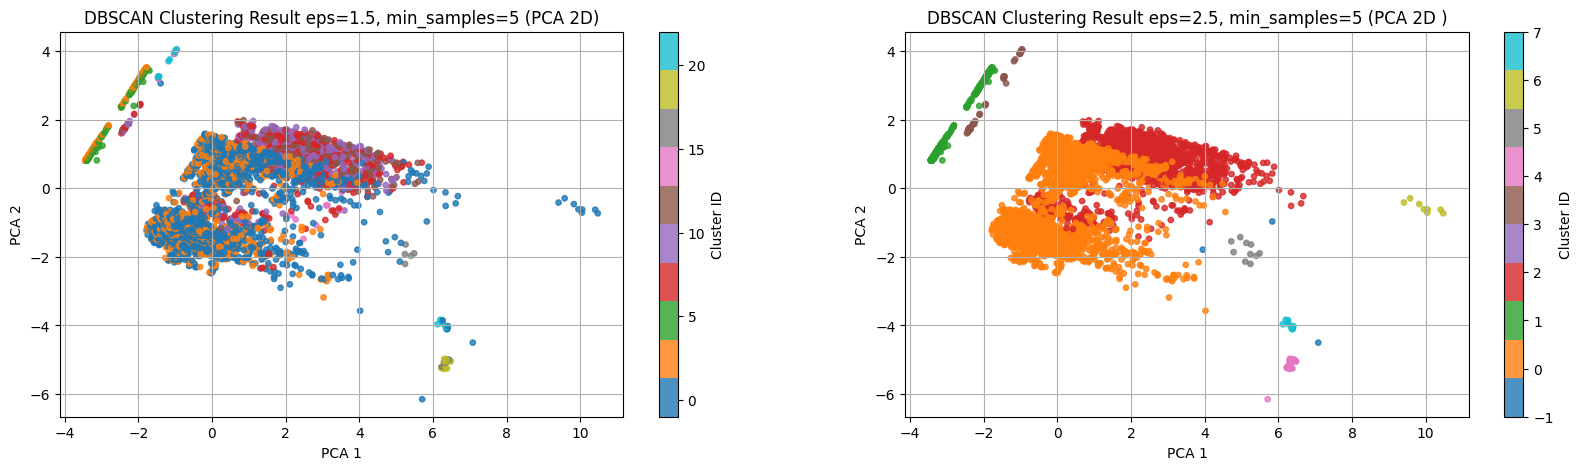

kWhDelivered        kWhRequested        WhPerMile  \
                                   mean    std         mean    std      mean   
DBSCAN_cluster_eps2.5_min5                                                     
-1                                18.60  15.61       153.61  46.48   1071.67   
 0                                 9.10   8.97        20.37  15.74    353.88   
 1                                 0.93   0.50         0.00   0.00      0.00   
 2                                18.78  14.06        36.60  21.78    319.17   
 3                                 0.96   0.54         0.00   0.00      0.00   
 4                                 5.16   1.64       200.00   0.00   2000.00   
 5                                29.22   9.20       153.80   0.00    769.00   
 6                                30.15  11.72       199.95   0.00    258.00   
 7                                 7.00   3.98       215.32   0.00   1538.00   

                                   milesRequested         \
                               std           mean    std   
DBSCAN_cluster_eps2.5_min5                                 
-1                          820.02         180.00  72.11   
 0                           71.49          60.97  50.77   
 1                            0.00           0.00   0.00   
 2                           72.60         120.05  74.53   
 3                            0.00           0.00   0.00   
 4                            0.00         100.00   0.00   
 5                            0.00         200.00   0.00   
 6                            0.00         775.00   0.00   
 7                            0.00         140.00   0.00   

                                          connectionTime  \
                                                safe_min   
DBSCAN_cluster_eps2.5_min5                                 
-1                         2021-02-26 06:40:03.329999924   
 0                         2020-08-01 00:32:07.230000019   
 1                         2020-06-08 08:08:39.039999962   
 2                         2021-02-19 14:14:25.609999895   
 3                         2020-06-03 12:52:30.579999924   
 4                         2021-07-28 12:24:34.240000010   
 5                         2021-06-16 12:10:32.099999905   
 6                         2021-08-05 15:15:06.119999886   
 7                         2021-08-12 06:49:48.700000048   

                                        doneChargingTime  \
                                                safe_min   
DBSCAN_cluster_eps2.5_min5                                 
-1                                                   NaT   
 0                         2020-08-01 02:52:09.759999990   
 1                         2020-06-08 10:25:42.559999943   
 2                                                   NaT   
 3                                                   NaT   
 4                         2021-07-28 13:27:04.380000114   
 5                         2021-06-16 16:49:36.500000000   
 6                                                   NaT   
 7                         2021-08-12 08:13:31.000000000   

                                      requestedDeparture  \
                                                safe_min   
DBSCAN_cluster_eps2.5_min5                                 
-1                         2021-02-26 15:52:03.329999924   
 0                         2020-08-01 05:38:36.609999895   
 1                                                   NaT   
 2                         2021-02-19 21:29:59.349999905   
 3                                                   NaT   
 4                         2021-07-28 17:24:34.240000010   
 5                         2021-06-16 23:02:20.099999905   
 6                         2021-08-06 15:23:06.119999886   
 7                         2021-08-13 06:51:48.700000048   

                                          disconnectTime  
                                                safe_min  
DBSCAN_cluster_eps2.5_min5                                
-1   

In [18]:
# 시각화
plt.figure(figsize=(20, 5))

plt.subplot(121)

scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1],
                    c=time_df['DBSCAN_cluster_eps1.5_min5'], 
                    cmap='tab10', s=15, alpha=0.8)
plt.title("DBSCAN Clustering Result eps=1.5, min_samples=5 (PCA 2D)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.colorbar(scatter, label='Cluster ID')

plt.subplot(122)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1],
                    c=time_df['DBSCAN_cluster_eps2.5_min5'],
                    cmap='tab10', s=15, alpha=0.8)
plt.title("DBSCAN Clustering Result eps=2.5, min_samples=5 (PCA 2D )")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.colorbar(scatter, label='Cluster ID')


plt.show()

# 0 제외한 값만 고려하는 사용자 정의 함수
def safe_min(series):
    series = series[series > 0]
    return series.mean() if not series.empty else np.nan


cluster_stats = time_df.groupby('DBSCAN_cluster_eps2.5_min5').agg({
    'kWhDelivered': ['mean', 'std'],
    'kWhRequested': ['mean', 'std'],
    'WhPerMile': ['mean', 'std'],
    'milesRequested': ['mean', 'std'],
    
    'connectionTime': [safe_min],
    'doneChargingTime': [safe_min],
    'requestedDeparture': [safe_min],
    'disconnectTime': [safe_min],
}).round(2)

for col in ['connectionTime', 'doneChargingTime', 'requestedDeparture', 'disconnectTime']:
    cluster_stats[(col, 'safe_min')] = pd.to_datetime(cluster_stats[(col, 'safe_min')], unit='s')


cluster_stats

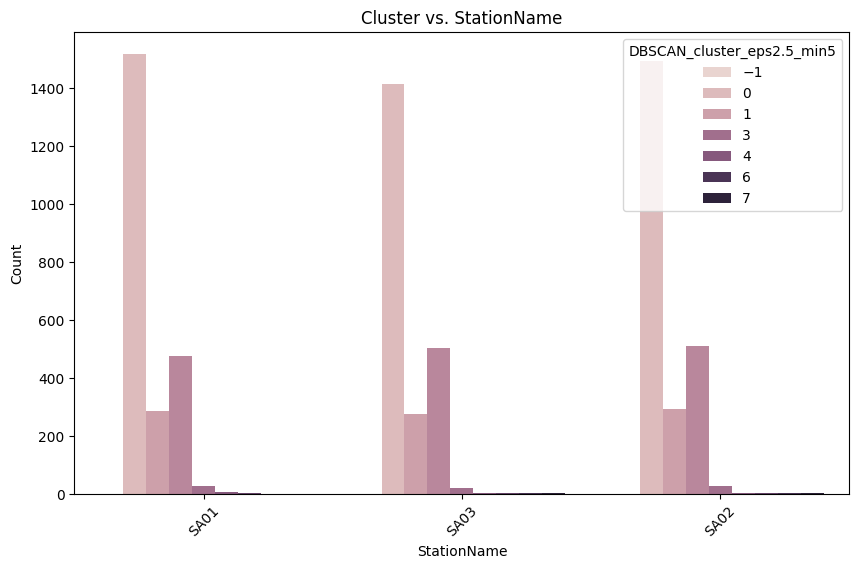

In [43]:
import seaborn as sns
# 예: 원본 지점명을 time_df에 붙이기 (LabelEncoder 사용 기준)
time_df['StationName'] = sort['StationId']  # 문자형 StationId

plt.figure(figsize=(10,6))
sns.countplot(x='StationName', hue='DBSCAN_cluster_eps2.5_min5', data=time_df)
plt.title("Cluster vs. StationName")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


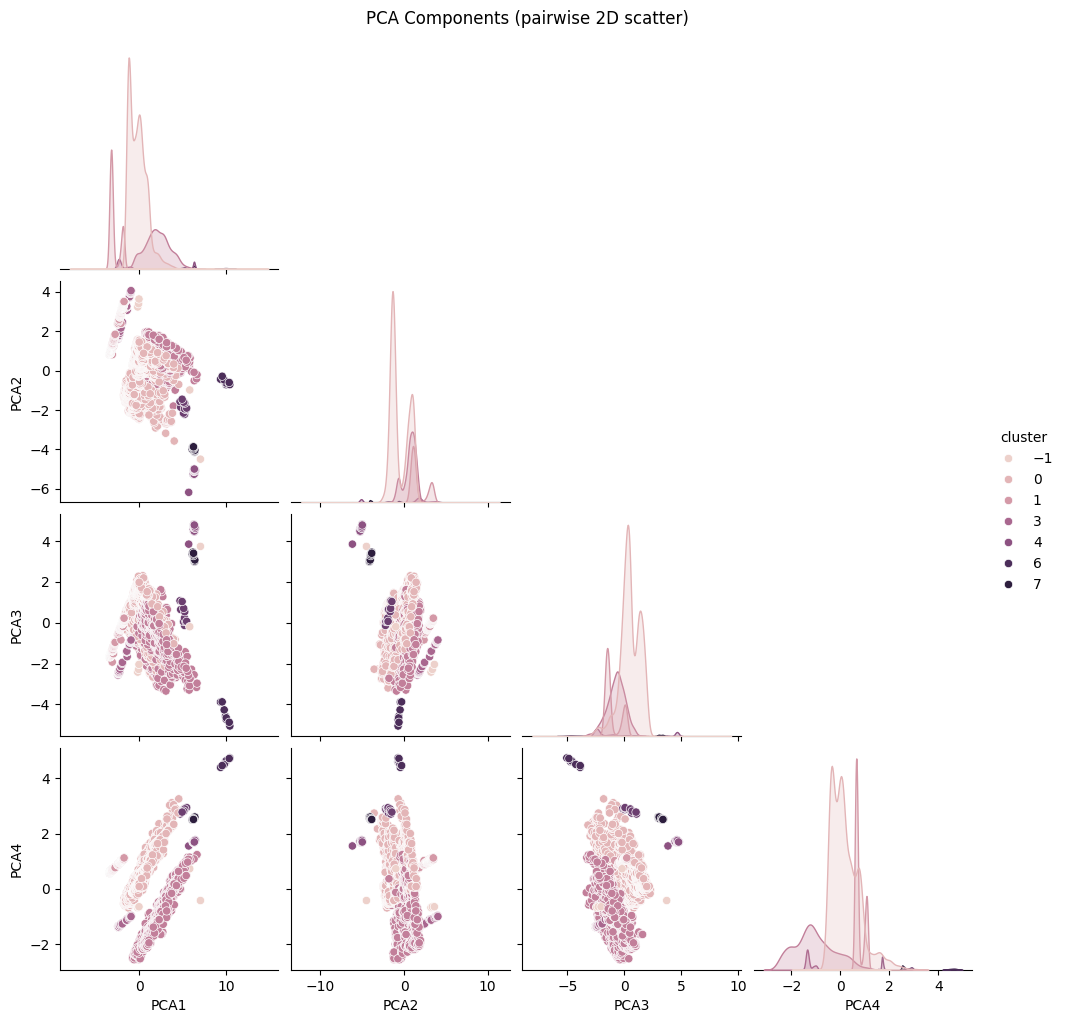

In [ ]:

import matplotlib.pyplot as plt

# Create a DataFrame from the PCA results for each sample
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2', 'PCA3', 'PCA4'])
pca_df['cluster'] = time_df['DBSCAN_cluster_eps2.5_min5']

sns.pairplot(pca_df, hue='cluster', corner=True)
plt.suptitle("PCA Components (pairwise 2D scatter)", y=1.02)
plt.show()

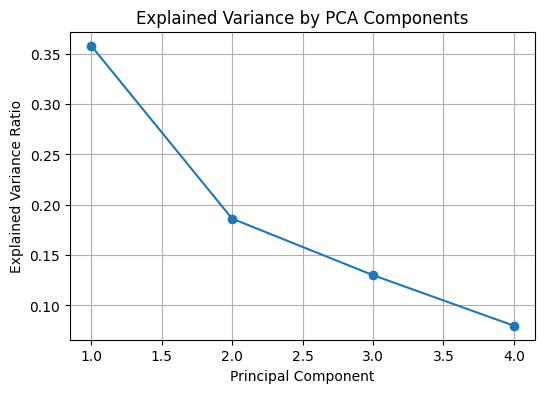

In [37]:
plt.figure(figsize=(6,4))
plt.plot(range(1, 5), pca.explained_variance_ratio_, marker='o')
plt.title('Explained Variance by PCA Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()


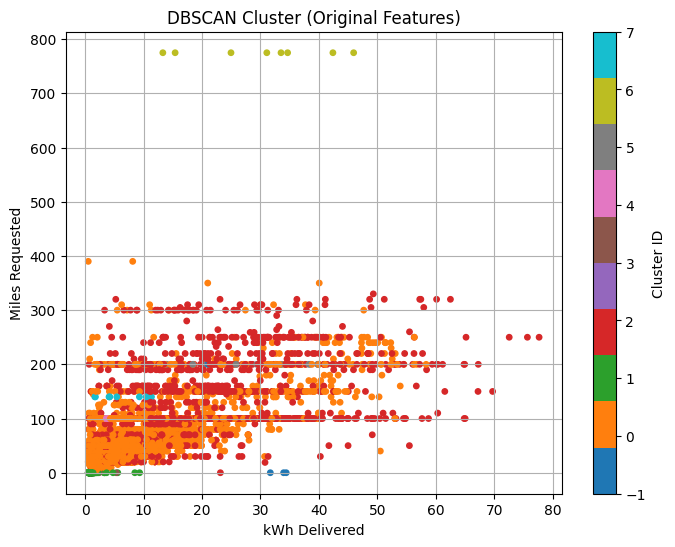

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(
    time_df['kWhDelivered'],
    time_df['milesRequested'],
    c=time_df['DBSCAN_cluster_eps2.5_min5'],
    cmap='tab10',
    s=15
)
plt.xlabel("kWh Delivered")
plt.ylabel("Miles Requested")
plt.title("DBSCAN Cluster (Original Features)")
plt.grid(True)
plt.colorbar(label='Cluster ID')
plt.show()


In [46]:
import plotly.graph_objects as go
import plotly.io as pio
import pandas as pd

# 브라우저로 렌더링 설정
pio.renderers.default = 'browser'

# 1. PCA로 3차원 축소
pca = PCA(n_components=3)
X_pca_3d = pca.fit_transform(x)  # 'x'는 전처리된 피처 (X_final 등)

# 2. 결과 DataFrame 구성
pca_df = pd.DataFrame(X_pca_3d, columns=["PCA1", "PCA2", "PCA3"])
pca_df['cluster'] = time_df['DBSCAN_cluster_eps2.5_min5'].astype(str)  # 군집 라벨
pca_df['cluster'] = pca_df['cluster'].astype(str)
# 3. Plotly 3D 시각화 객체 생성
fig = go.Figure()

# 군집 라벨별로 색 다르게 시각화
for cluster_id in sorted(pca_df['cluster'].unique()):
    cluster_data = pca_df[pca_df['cluster'] == cluster_id]
    fig.add_trace(go.Scatter3d(
        x=cluster_data['PCA1'],
        y=cluster_data['PCA2'],
        z=cluster_data['PCA3'],
        mode='markers',
        marker=dict(size=1),
        name=f'Cluster {cluster_id}',
        opacity=0.8
    ))

# 4. 레이아웃 설정
fig.update_layout(
    title="DBSCAN Clusters (PCA 3D View)",
    scene=dict(
        xaxis_title='PCA1',
        yaxis_title='PCA2',
        zaxis_title='PCA3'
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)

# 5. 시각화 → 브라우저에서 자동 실행
fig.show()


In [ ]:
# Re-import required packages after code execution state reset
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

random.seed(42)
np.random.seed(42)

n = 10  # number of rows
base_time = datetime(2019, 11, 1)

# EVSE 관련 정보
station_ids = ["ST01", "ST02", "ST03"]
ev_ids = {
    "ST01": [f"ST01-EV{str(i).zfill(2)}" for i in range(1, 6)],
    "ST02": [f"ST02-EV{str(i).zfill(2)}" for i in range(1, 4)],
    "ST03": [f"ST03-EV{str(i).zfill(2)}" for i in range(1, 3)],
}
ev_type_choices = ["완속", "중속", "급속"]

# OCPP 기반 disconnectReason 매핑
reason_map = {
    "Available": ["EVDisconnected", "Local", "EnergyLimitReached", "PowerLimitReached"],
    "Faulted": ["EmergencyStop", "Faulted", "Other"],
    "Finishing": [None]
}

data = []

for _ in range(n):
    conn_time = base_time + timedelta(minutes=random.randint(0, 60*24*60))
    ev_type = random.choice(ev_type_choices)
    station_id = random.choice(station_ids)
    ev_id = random.choice(ev_ids[station_id])

    kwh_requested = round(random.choice([0.0] * 2 + [random.uniform(5, 80)] * 8), 2)

    if kwh_requested == 0:
        kwh_delivered = round(random.uniform(0.0, 1.0), 2)
        wh_per_mile = 0.0
        miles_requested = 0.0
    else:
        dist = random.choice([
            np.random.beta(1, 3),  # 낮음
            np.random.beta(2, 2),  # 보통
            np.random.beta(3, 1)   # 많음
        ])
        dist = min(dist, 1.2)
        kwh_delivered = round(kwh_requested * dist, 2)
        wh_per_mile = round(random.uniform(180, 400), 2)
        miles_requested = round((kwh_requested * 1000) / wh_per_mile, 1)

    done_time, disconnect_time, requested_departure = None, None, None
    evse_status = None
    disconnect_reason = None

    scenario = random.choices(
        population=[
            "completed_disconnect", "completed_still_connected",
            "faulted_disconnected", "faulted_connected",
            "connected_only", "user_cancel",
            "auto_topup", "test_mode"
        ],
        weights=[0.3, 0.15, 0.1, 0.1, 0.1, 0.05, 0.15, 0.05],
        k=1
    )[0]

    if scenario == "completed_disconnect":
        done_time = conn_time + timedelta(hours=random.uniform(0.5, 6))
        disconnect_time = done_time + timedelta(minutes=random.randint(1, 30))
        evse_status = "Available"
        disconnect_reason = random.choice(reason_map["Available"])

    elif scenario == "completed_still_connected":
        done_time = conn_time + timedelta(hours=random.uniform(0.5, 6))
        evse_status = "Finishing"

    elif scenario == "faulted_disconnected":
        done_time = conn_time + timedelta(hours=random.uniform(0.1, 2))
        disconnect_time = done_time + timedelta(minutes=random.randint(1, 30))
        evse_status = "Faulted"
        disconnect_reason = random.choice(reason_map["Faulted"])

    elif scenario == "faulted_connected":
        done_time = conn_time + timedelta(hours=random.uniform(0.1, 2))
        evse_status = "Faulted"

    elif scenario == "connected_only":
        evse_status = "Finishing"

    elif scenario == "user_cancel":
        disconnect_time = conn_time + timedelta(minutes=random.randint(1, 15))
        evse_status = "Available"
        disconnect_reason = "EVDisconnected"
        kwh_requested = 0.0
        kwh_delivered = 0.0
        wh_per_mile = 0.0
        miles_requested = 0.0

    elif scenario == "auto_topup":
        kwh_requested = 0.0
        kwh_delivered = round(random.uniform(1, 2), 2)
        done_time = conn_time + timedelta(minutes=random.randint(10, 30))
        disconnect_time = done_time + timedelta(minutes=random.randint(1, 10))
        evse_status = "Available"
        disconnect_reason = "PowerLimitReached"
        wh_per_mile = round(random.uniform(180, 400), 2)
        miles_requested = round((kwh_delivered * 1000) / wh_per_mile, 1)

    elif scenario == "test_mode":
        kwh_requested = 0.0
        kwh_delivered = round(random.uniform(0.1, 0.5), 2)
        disconnect_time = conn_time + timedelta(minutes=random.randint(1, 5))
        evse_status = "Available"
        disconnect_reason = "Other"
        wh_per_mile = 0.0
        miles_requested = 0.0

    if disconnect_time is None:
        disconnect_reason = None

    if random.random() < 0.2:
        requested_departure = None
    else:
        requested_departure = conn_time + timedelta(hours=random.uniform(1, 10))

    row = {
        'connectionTime': conn_time.replace(microsecond=0),
        'doneChargingTime': done_time.replace(microsecond=0) if done_time else None,
        'kWhDelivered': kwh_delivered,
        'kWhRequested': kwh_requested,
        'WhPerMile': wh_per_mile,
        'milesRequested': miles_requested,
        'requestedDeparture': requested_departure.replace(microsecond=0) if requested_departure else None,
        'disconnectTime': disconnect_time.replace(microsecond=0) if disconnect_time else None,
        'disconnectReasone': disconnect_reason,
        'EVESstatus': evse_status,
        'StationId': station_id,
        'EVESID': ev_id,
        'EVESTYPE': ev_type
    }
    data.append(row)

df_final = pd.DataFrame(data)
df_final



,충전소위치,충전기이름,충전기타입,충전기상태,충전기용량,방전지원여부,예약충전,충전량(kWh),요청충전량(kWh),방전량(kWh),...,연결시작시간,연결종료시간,충전시작시간,충전종료시간,마지막충전종료시간,출발예상시간,베터리용량(kWh),시작베터리%,종료베터리%,연비(Wh/km)
0,ST03,EVSE_2,FC,Charging,30,n,y,40,40,0,...,2019-12-18T03:43:00+00:00,2019-12-18T04:32:00+00:00,2019-12-18T04:01:00+00:00,2019-12-18T04:22:00+00:00,2019-12-17T10:43:00+00:00,None,60,23.2,71.4,6.11
1,ST03,EVSE_1,FC,Charging,200,n,n,54,52,0,...,2019-11-29T18:17:00+00:00,2019-11-29T20:18:00+00:00,2019-11-29T18:18:00+00:00,2019-11-29T20:05:00+00:00,2019-11-29T09:17:00+00:00,2019-11-29T20:05:00+00:00,60,26.0,92.4,4.28
2,ST01,EVSE_6,FC,Available,10,n,n,7,4,0,...,2019-11-23T19:16:00+00:00,2019-11-23T21:09:00+00:00,2019-11-23T19:18:00+00:00,2019-11-23T21:01:00+00:00,2019-11-22T22:16:00+00:00,None,50,39.4,21.7,5.82
3,ST03,EVSE_5,SC,Charging,10,y,y,5,6,3,...,2019-11-19T02:54:00+00:00,2019-11-19T05:04:00+00:00,2019-11-19T03:02:00+00:00,2019-11-19T05:02:00+00:00,2019-11-18T10:54:00+00:00,2019-11-19T05:03:00+00:00,75,19.8,6.6,5.32
4,ST02,EVSE_6,FC,Charging,10,n,n,15,16,0,...,2019-11-11T17:46:00+00:00,2019-11-11T18:32:00+00:00,2019-11-11T17:54:00+00:00,2019-11-11T18:24:00+00:00,2019-11-11T01:46:00+00:00,2019-11-11T18:56:00+00:00,100,5.0,17.6,5.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,ST03,EVSE_2,FC,Reserved,50,n,y,68,66,0,...,2019-12-26T18:26:00+00:00,2019-12-26T20:08:00+00:00,2019-12-26T18:38:00+00:00,2019-12-26T19:57:00+00:00,2019-12-26T09:26:00+00:00,2019-12-26T20:39:00+00:00,50,40.8,100.0,5.57
196,ST01,EVSE_2,FC,Available,10,n,n,11,10,0,...,2019-12-21T12:32:00+00:00,2019-12-21T14:24:00+00:00,2019-12-21T12:42:00+00:00,2019-12-21T14:12:00+00:00,2019-12-20T16:32:00+00:00,2019-12-21T14:20:00+00:00,90,59.7,15.1,6.87
197,ST01,EVSE_9,FC,Available,50,n,y,67,64,0,...,2019-12-29T06:51:00+00:00,2019-12-29T08:20:00+00:00,2019-12-29T06:56:00+00:00,2019-12-29T08:14:00+00:00,2019-12-28T14:51:00+00:00,2019-12-29T09:20:00+00:00,50,32.3,100.0,5.53
198,ST02,EVSE_7,FC,Available,10,n,n,15,20,0,...,2019-11-08T14:39:00+00:00,2019-11-08T15:21:00+00:00,2019-11-08T14:59:00+00:00,2019-11-08T15:16:00+00:00,2019-11-08T05:39:00+00:00,None,50,24.7,32.0,7.50


In [ ]:
import matplotlib.pyplot as plt

# Set connectionTime as index for resampling
hourly_kwh = df_final.set_index('connectionTime')['kWhDelivered'].resample('1h').sum()

plt.figure(figsize=(30,5))
plt.plot(hourly_kwh.index, hourly_kwh)
plt.xlabel('Date')
plt.ylabel('Total kWh Delivered')
plt.title('Hourly Total kWh Delivered')
plt.show()

In [ ]:
# Set connectionTime as index for resampling
hourly_kwh = df.set_index('connectionTime')['kWhDelivered'].resample('1h').sum()

plt.figure(figsize=(30,5))
plt.plot(hourly_kwh.index, hourly_kwh)
plt.xlabel('Date')
plt.ylabel('Total kWh Delivered')
plt.title('Hourly Total kWh Delivered')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Group by date and sum kWh delivered per day
daily_kwh = df.groupby(df['connectionTime'].dt.date)['kWhDelivered'].sum()

plt.figure(figsize=(30,5))
plt.plot(daily_kwh.index, daily_kwh.values)
plt.xlabel('Date')
plt.ylabel('Total kWh Delivered')
plt.title('Daily Total kWh Delivered')
plt.show()